> **기본 unpacking**
- list, tuple, strin, dictionary 등 모든 iterable한 data type들은 다 가능

- 그러나, set은 순서가 없는 data type으로, unpacking을 해도 순서가 뒤죽박죽으로 값이 할당되기에 잘 사용하지 않는다.

- [packing, unpacking](https://wikidocs.net/22801)


In [ ]:
a,b,c = 'xyz'
print(a, b, c, sep = ' ')

# Dictionary의 unpacking

# dictionary는 unpacking 하면 key값만 나온다.
a,b,c = {'d' : 1,'e': 2, 'f' : 3}
print(a, b, c, sep = ' ')

# dictionary 뒤에 .values()
a,b,c = {'d' : 1,'e': 2, 'f' : 3}.values()
print(a, b, c, sep = ' ')

# dictionary 뒤에 .items()
a,b,c = {'d' : 1,'e': 2, 'f' : 3}.items()
print(a, b, c, sep = ' ')

# dictionary의 override
# dictionary에는 key가 1개만 올 수 있기에, 순서상 뒤에 정의된 a = 5가 이전 값을 override한다
d1 = {'a' : 1, 'b' : 2}
d2 = {'a' : 5, 'c' : 6}
d = {**d1, **d2}
print(d)

x y z
d e f
1 2 3
('d', 1) ('e', 2) ('f', 3)
{'a': 5, 'b': 2, 'c': 6}


### **nested unpacking**
- 겹겹이 쌓여있는 list를 unpacking하는 방법

In [ ]:
# error : 중첩 list를 고려하지 않고 변수를 대입해주면 오류가 난다.
p = [1,2,[3,4]]
a,b,c,d = p

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
# correct code
p = [1,2,[3,4]]
a, b,(c,d) = p
print(a,b,c,d)

1 2 3 4


### **위치 인수 (Positional arguments)**
- 위치인수는 인자순서에 따라 파라미터에게 값이 전달된다. tuple, list의 경우 asterisk(\*, \*\*) 를 통해 언팩킹 하여 사용할 수 있다.

- \*의 기능 : **"\*가 없는 변수가 값을 할당받고 할당받지 못한 나머지 값들을 모아서 리스트로 만드는 기능"**

> asterisk(**) 가 2개인 이유
- \* 하나당 1번 압축해제를 생각하면 쉽다.
- \* 는 튜플과 리스트, 즉 인덱스 하나만 압축이 풀린다.
- \* 딕셔너리에서는 키만 언패킹 되어버리고, 값은 묶인 상태, 쓸 수가 없다.
- \*\* 는 키와 값 2가지를 언패킹 한다 생각하면 된다.

> ## **주의 사항**
- 변수 부분에는 \*를 한번만 사용 가능하다.
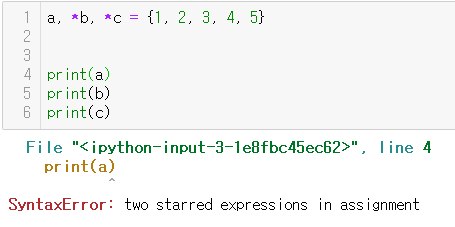


> ### **Container 자체를 unpacking하는 \***

In [ ]:
# 앞에서는 리스트값을 각 변수에 할당했는데, 값이 변수보다 많을 경우에 그렇게 사용한다.
# 그러나, 리스트 자체를 분해할 수도 있다
l1 = [1,2,3]
print(*l1)

1 2 3


In [ ]:
# unpacking을 통해 우리가 원하는 컨테이너에 넣어서 원소끼리 합칠 수도 있다.
l1 = [1,2,3]
l2 = [4,5,6]
l3 = [*l1, *l2]
print(l3)
# *이 없었다면, [[1,2,3],[4,5,6]]으로 list로 뭉쳐진 상태로 결합될 것이다.

[1, 2, 3, 4, 5, 6]


> ### **중요!**
- iterable 자체에 \*을 넣는 경우는 iterable객체 내부의 원소들을 분리시켜주지만, \*자체로는 사용할 수 없다. tuple이든 list든 어떤 것으로 감싸주어야만 사용 가능하다.

In [ ]:
l4 = [1,2,3]
l5 = *l4
print(l5)

SyntaxError: can't use starred expression here (<ipython-input-15-91f922d75939>, line 2)

In [ ]:
# 올바른 코드 => tuple로 감싸준다
l6 = {1,2,3}
l7 = *l6,
print(l7)
# ()로 감싸도 tuple이 되지만, 괄호는 튜플을 나타내는 보조적인 수단
# tuple을 정의하는 진짜 표현은 "," 이다.

(1, 2, 3)


> 파이썬에서 *을 사용한 unpacking은 여러 요소를 풀어 해체하거나 전달하는 데 사용됩니다. 이것은 함수 호출, 튜플 언패킹, 리스트 언패킹 등 다양한 상황에서 활용됩니다.

- packing은 여러개의 객체를 하나의 객체로 합쳐주는 것
- unpacking은 여러개의 객체를 포함하고 있는 하나의 객체를 풀어주는 것

### **\*을 통한 위치 인자 packing**
- 함수가 받을 인자의 갯수를 유연하게 지정
- \*s는 나머지 모든 값을 리스트에 담는 역할 (나머지 모든 값을 리스트로 가져오는 역할) => packing
- 여러 개의 값을 가진 리스트, 튜플 등에서 필요한 값만 추출하고자 할 때 유용

```python
def func(*args):
      print(args)
      print(type(args))

func(1, 2, 3, 4, 5, 6, 'a', 'b')
# result
(1, 2, 3, 4, 5, 6, 'a', 'b')
<class 'tuple'>
```



In [ ]:
# packing의 활용

def sum_all(*numbers):
      result = 0
      for number in numbers:
           result += number
      return result

print(sum_all(1, 2, 3)) # 6
print(sum_all(1, 2, 3, 4, 5, 6)) # 21

6
21


In [ ]:
# 키워드 인자에 패킹은 **kwargs을 통해 작성 가능
def kwpacking(**kwargs):
     print(kwargs)
     print(type(kwargs))

kwpacking(a=1, b=2, c=3)

{'a': 1, 'b': 2, 'c': 3}
<class 'dict'>


> 키워드 인자는 패킹한 인자들을 키워드와 인자 쌍으로 이뤄진 딕셔너리로 관리합니다.

In [ ]:
# 키워드 인자 활용
def print_family_name(father, mother, **sibling):
      print("아버지 :", father)
      print("어머니 :", mother)
      if sibling:
           print("호적 메이트..")
           for title, name in sibling.items():
                 print('{} : {}'.format(title, name))

print_family_name("홍길동", '심사임당', 누나='김태희', 여동생='윤아')

아버지 : 홍길동
어머니 : 심사임당
호적 메이트..
누나 : 김태희
여동생 : 윤아


> 위치 인자와 키워드 인자 동시 packing

In [ ]:
def print_family_name(*parents, **sibling):
      print("아버지 :", parents[0])
      print("어머니 :", parents[1])
      if sibling:
           print("호적 메이트..")
           for title, name in sibling.items():
                 print('{} : {}'.format(title, name))

print_family_name("홍길동", '심사임당', 누나='김태희', 여동생='윤아')

아버지 : 홍길동
어머니 : 심사임당
호적 메이트..
누나 : 김태희
여동생 : 윤아


## **\*을 통한 unpacking**


>- **함수에서 unpacking을 할때는, 매개변수에 *을 붙이는게 아니라 인자 앞에 *을 붙여서 사용합니다.**
- 매개변수(Parameter): **함수가 호출될 때 전달되는 값(argument)을 받아들이는 변수**로, 함수 정의 시에 사용되는 변수이다.
- 인자(Argument): 함수를 호출할 때 전달되는 값으로, **함수를 호출할 때 매개변수에 전달되는 값**입니다.
- unpacking은 함수를 호출할때 인자를 해체하는 개념이기 때문에, 해채된 결과가 함수의 매개변수의 갯수와 다르다면 에러가 발생합니다.

```python
# unpacking 예시
def sum(a, b, c):
    return a + b + c

numbers = [1, 2, 3]
sum(numbers) # error

print(sum(*numbers)) # 출력 : 6
# [1, 2, 3]을 인자로 보낼때, *을 붙이면 unpacking이 발생

sum(*[1, 2, 3, 4])
# 매개변수 개수와 다르기에 error 발생

```
>- unpacking은 아래와 같은 순서로 변경되어 실행됩니다.
1. sum(*numbers)
2. sum(*[1, 2, 3])
3. sum(1, 2, 3)


```python
# unpacking 예시
def example_unpacking_function(param1, param2, *args):
    print("param1:", param1)
    print("param2:", param2)
    print("args:", args)

# 인자 언패킹을 통한 함수 호출
argument_list = [1, 2, 3, 4, 5]
example_unpacking_function(*argument_list)

```

```python
# 위치인자를 unpacking할때는 위에 예에서는 list타입이였지만, Container객체라면 다 가능하다
sum(*'abc') # 'abc'
sum(*(4, 5, 6)) # 15
sum(*{'가', '나', '다'}) # '나다가'
sum(*{'치킨': 3, '피자': 12, '음료수': 10}) # '치킨피자음료수'
```

---

< \*의 개수에 따라 나머지 값들을 어떻게 처리할지가 결정된다>

- \*가 없는 경우

```python
a, b, c = [1, 2, 3]
print(a, b, c)  # 결과: 1 2 3
# 이 경우 모든 값이 각 변수에 할당됩니다.
```

- \*가 하나인 경우

```python
a, *rest = [1, 2, 3, 4]
print(a)      # 결과: 1
print(rest)   # 결과: [2, 3, 4]
# 여기서 *rest는 나머지 값들을 리스트로 가져옵니다.
```


- \*가 여러 개인 경우

```python
a, *middle, b, c = [1, 2, 3, 4, 5]
print(a)      # 결과: 1
print(middle) # 결과: [2, 3]
print(b)      # 결과: 4
print(c)      # 결과: 5
# 여기서 *middle은 나머지 값을 리스트로 가져오며, 그 뒤의 변수 b와 c에는 각각 남은 값들이 할당됩니다.
```



```python
*a, b, c = [1, 2, 3, 4, 5]
print(a)      # 결과: [1, 2, 3]
print(b)      # 결과: 4
print(c)      # 결과: 5
```
---
- 동일한 방식으로 키워드인자로 unpacking할 수 있습니다. unpacking하기 위해선 인자가 key와 인자로 구성되어 있는 mapping타입, 즉 dict가 필요합니다.

```python
def cal(first, op, second):
    if op == '+':
        return first + second
    if op == '/':
        return first / second
    if op == '-':
        return first - second
    if op == '*':
        return first * second

prob = {
  'first': 12,
  'second': 34,
  'op': '*'
}

cal(**prob) # 결과 : 408
# 위치인자의 unpacking처럼 unpacking되는 인자는 매개변수의 키워드 매개변수와 일치해야합니다.
```
> - 위 예제에 키워드 인자의 unpacking은 다음과 같이 작동합니다.
1. cal(**prob)
2. cal(prob = {
  'first': 12,
  'second': 34,
  'op': '*'
})
3. cal(first=12, second=34, op='*')

In [ ]:
# args에는 '안녕하세요', '파이썬 꿀잼!'
# kwargs에는 sep='~~ '
def start(func, *args, **kwargs):
    print("함수를 시작합니다.")
    return func(*args, **kwargs)
start(print, '안녕하세요', '파이썬 꿀잼!', sep='~~ ')

- '안녕하세요'와 '파이썬 꿀잼!'는 위치 인자로 전달되어 args 튜플에 수집됩니다.
- sep='~~ '는 키워드 인자로 전달되어 kwargs 사전에 수집됩니다.
- 그래서 func(*args, **kwargs)가 start 함수 내에서 실행되면, 이는 print('안녕하세요', '파이썬 꿀잼!', sep='\~~ ')를 호출하는 것과 동일합니다. 이로써 두 문자열이 '\~~ '로 구분되어 출력됩니다.

>  \*\*kwargs는 키워드 인자를 딕셔너리 형태로 받는 것이 일반적이지만, 변수명과 값의 형태로 전달되는 것도 가능합니다. 예를 들어, sep='~~'과 같이 키워드 인자를 변수명과 값의 형태로 전달하는 것이 흔히 사용됩니다. 이 경우에는 \*\*kwargs가 이를 딕셔너리로 묶어서 받아들입니다.  **kwargs는 실제로 함수 내부에서 딕셔너리로 처리되지만, 호출할 때는 키워드 인자들이 변수명과 값의 형태로 전달될 수 있습니다.

In [ ]:
def example_unpacking_function(param1, param2, *args):
    print("param1:", param1)
    print("param2:", param2)
    print("args:", args)

# 인자 언패킹을 통한 함수 호출
argument_list = [1, 2, 3, 4, 5]
example_unpacking_function(*argument_list)
# *을 사용하여 인자를 언패킹하면,
# 리스트나 튜플 등의 iterable에서 개별 값들을 함수에 전달할 수 있습니다.

param1: 1
param2: 2
args: (3, 4, 5)


In [ ]:
# 함수 호출에서의 사용
# 함수 정의 시 *args를 사용하여 가변 개수의 인자를 받을 수 있습니다.
# 호출할 때는 여러 값을 *으로 언패킹하여 전달할 수 있습니다.
def example_function(*args):
    for arg in args:
        print(arg)

example_function(1, 2, 3)

1
2
3


In [ ]:
# 튜플 언패킹
tuple1 = (1, 2, 3)
tuple2 = (4, 5, 6)

combined_tuple = (*tuple1, *tuple2)
print(combined_tuple)

(1, 2, 3, 4, 5, 6)


In [ ]:
# 딕셔너리 언패킹
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}

combined_dict = {**dict1, **dict2}
print(combined_dict)

{'a': 1, 'b': 2, 'c': 3, 'd': 4}
